# Imports

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# Definindo funções

In [2]:
def plot_boxplot(data: pd.DataFrame, title: str, size: tuple=(6, 6)) -> None:
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    ax.boxplot(data)
    ax.set_title(title)
    plt.show()

In [3]:
def plot_histogram(data: pd.DataFrame, title: str, size: tuple=(6, 6)) -> None:
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    ax.hist(data, bins=[i for i in range(min(data), max(data)+1)])
    ax.set_title(title)
    plt.show()

In [4]:
def plot_corr_matrix(data: pd.DataFrame, title: str, size: tuple=(6, 6)) -> None:
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    ax = sns.heatmap(data, vmin=-1, vmax=1, annot=True)
    ax.set_title(title)
    plt.show()

In [5]:
def plot_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray, title: str, size: tuple=(6, 5)) -> None:
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, center=True, annot=True)
    ax.set_title(title)
    plt.show()

# Pré-Processamento de dados

In [6]:
df = pd.read_csv("winequality-white.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,39.00,24.0,92.0,99.114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,47.00,57.0,168.0,9.949,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,41.00,30.0,111.0,99.254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,22.00,20.0,110.0,98.869,3.34,0.38,12.8,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   object 
 11  quality               4898 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 459.3+ KB


### Limpando features

In [8]:
df.alcohol.unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [9]:
idxs = []
for i, row in df.iterrows():
    if len(row["alcohol"]) > 7:
        idxs.append(i)
len(idxs)

34

In [10]:
df.drop(idxs, axis=0, inplace=True)

In [11]:
df.alcohol.unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '10.98', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '12.75', '13.8', '12.15', '13.05', '11.75',
       '10.65', '10.15', '12.25', '11.85', '11.65', '13.55', '11.95',
       '11.55', '12.05'], dtype=object)

### Plots e descrições

In [12]:
df.drop("quality", axis=1).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,6.859200,11.092807,0.334396,6.398355,40.611271,35.283717,138.386822,113.861974,3.188255,0.489613
std,0.843096,67.771299,0.121153,5.079978,25.023667,17.023142,42.542545,233.355079,0.151101,0.113993
min,3.800000,0.080000,0.000000,0.600000,0.020000,2.000000,9.000000,0.990000,2.720000,0.220000
25%,6.300000,0.210000,0.270000,1.700000,33.000000,23.000000,108.000000,9.943000,3.087500,0.410000
50%,6.800000,0.260000,0.320000,5.200000,42.000000,34.000000,134.000000,98.946000,3.180000,0.470000
75%,7.300000,0.330000,0.390000,9.900000,49.000000,46.000000,167.000000,99.424000,3.280000,0.550000
max,14.200000,965.000000,1.660000,65.800000,346.000000,289.000000,440.000000,999.000000,3.820000,1.080000


In [13]:
df.quality.describe()

count    4864.000000
mean        5.877056
std         0.886585
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

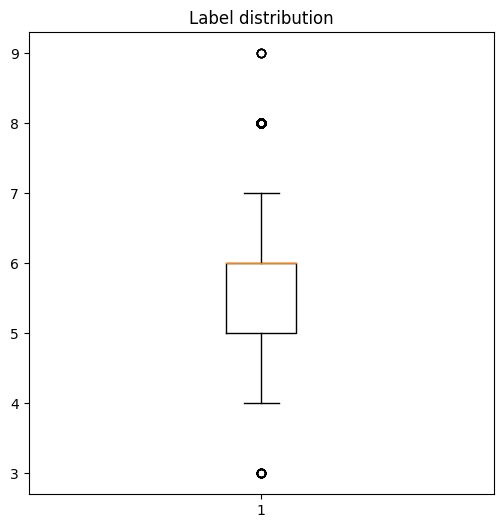

In [14]:
plot_boxplot(df["quality"], "Label distribution")

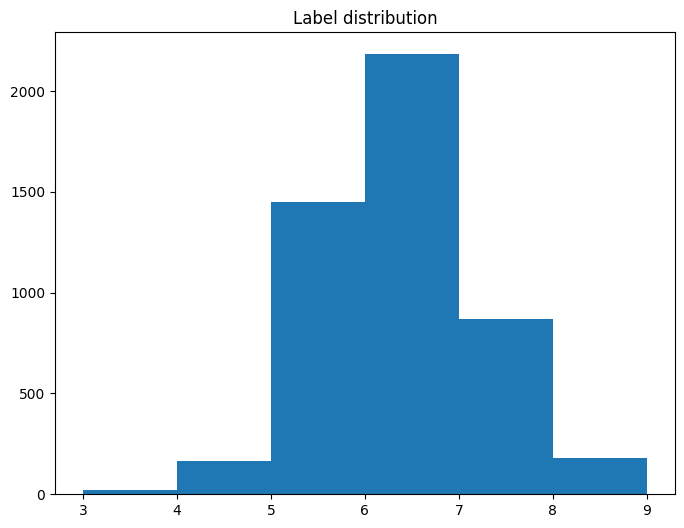

In [15]:
plot_histogram(df["quality"], "Label distribution", size=(8, 6))

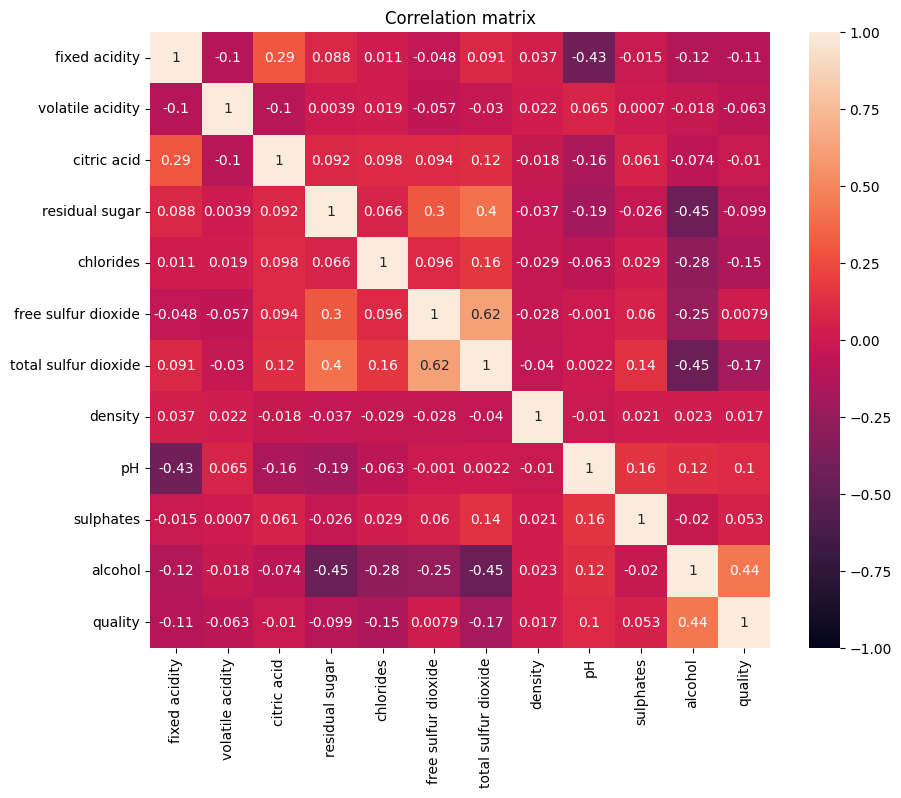

In [16]:
plot_corr_matrix(df.corr(), title="Correlation matrix", size=(10,8))

### Separação de datasets proporcionalmente

70% para teste/validação e 30% para teste

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.3, random_state=42, stratify=df["quality"])
len(X_train), len(X_test), len(y_train), len(y_test)

(3404, 1460, 3404, 1460)

# Modelos de classificação

## Árvores de Decisão

Links úteis:

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
len(X_val), len(X_train), len(y_val), len(y_train)

(681, 2723, 681, 2723)

In [117]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

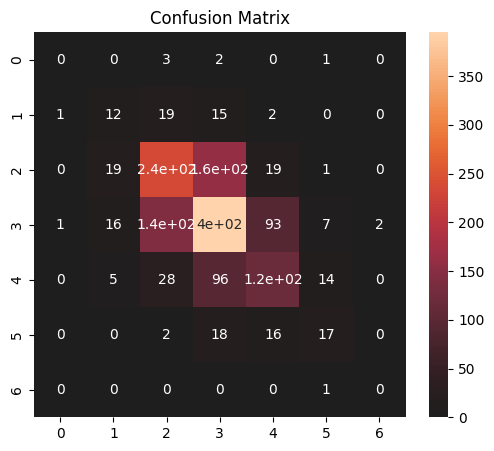

In [118]:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix")

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.24      0.24        49
           5       0.55      0.54      0.55       435
           6       0.58      0.60      0.59       655
           7       0.48      0.45      0.46       261
           8       0.41      0.32      0.36        53
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1460
   macro avg       0.32      0.31      0.31      1460
weighted avg       0.53      0.53      0.53      1460



### Tunando hiperparâmetros com o optuna

max_depth:

 - tamanho máximo da árvore
 - default=None
 - valores possíveis: int

min_samples_split:

 - número mínimo de exemplos para poder dar split na folha
 - default=2
 - valores possíveis: int ou float

min_samples_leaf:

 - número mínimo de exemplos na folha para ser uma folha. O split só será feito se as folhas tiverem esse valor mínimo.
 - default=1
 - valores possíveis: int ou float

In [188]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    tree = DecisionTreeClassifier(criterion='entropy',
                                  random_state=42,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    predicted = tree.predict(X_val)

    return f1_score(y_val, predicted, average="macro")

In [189]:
study = optuna.create_study()
study.optimize(objective, n_trials=500, show_progress_bar=True) 

[I 2023-12-14 00:28:57,887] A new study created in memory with name: no-name-5b98c2f8-76c3-4aba-b35d-ce1ea9e78c4a


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2023-12-14 00:28:57,920] Trial 0 finished with value: 0.2772058921490362 and parameters: {'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.2772058921490362.
[I 2023-12-14 00:28:57,937] Trial 1 finished with value: 0.2280401271302377 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.2280401271302377.
[I 2023-12-14 00:28:57,963] Trial 2 finished with value: 0.2685518434696591 and parameters: {'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.2280401271302377.
[I 2023-12-14 00:28:57,981] Trial 3 finished with value: 0.24614415834975947 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.2280401271302377.
[I 2023-12-14 00:28:58,008] Trial 4 finished with value: 0.2898720501982118 and parameters: {'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 1 w

In [190]:
study.best_params

{'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1}

In [191]:
model = DecisionTreeClassifier( criterion='entropy',
                                random_state=42,
                                max_depth=study.best_params["max_depth"],
                                min_samples_split=study.best_params["min_samples_split"], 
                                min_samples_leaf=study.best_params["min_samples_leaf"])
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

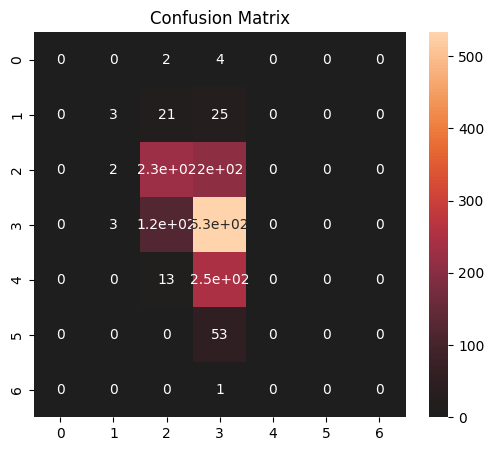

In [192]:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix")

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.38      0.06      0.11        49
           5       0.60      0.52      0.56       435
           6       0.50      0.81      0.62       655
           7       0.00      0.00      0.00       261
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1460
   macro avg       0.21      0.20      0.18      1460
weighted avg       0.41      0.52      0.45      1460



C:\Users\bianc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bianc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bianc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

## Bayesiano Ingênuo

## Regressão Logística

## K-Vizinhos

# Síntese de Resultados

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7eed69e0-5b29-47ac-bad0-2f77c9050b11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>